<a href="https://colab.research.google.com/github/Sofya02/Nikolaenko_SII9/blob/main/Lab1_Nikolaenko_Sii9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Николаенко Софья СИИ-9

> Лабораторная работа №1



In [66]:
#импортируем библиотеку
import pandas as pd
# применим функцию read_csv() и посмотрим на первые три записи файла data.csv
data = pd.read_csv('insurance.csv')
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [67]:
#Обобщенный просмотр данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns

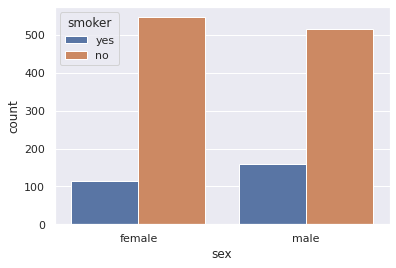

In [69]:
# посмотрим насколько мужчин больше курят, чем женщины
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'sex', hue = 'smoker', data = data)

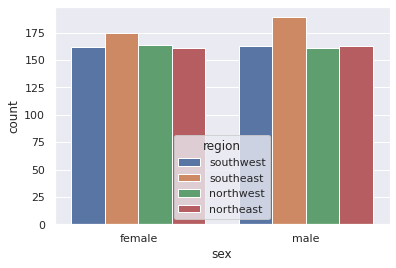

In [70]:
#Посмотрим, в как()их регионах мужчины и женщины предпочитают жить больше
sns.countplot(x = 'sex', hue = 'region', data = data)

In [71]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество sum()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
#Работа с категориальными переменными
# применим one-hot encoding к переменной Sex (пол) с помощью метода .get_dummies()
pd.get_dummies(data['sex']).head(3)

,female,male
0,1,0
1,0,1
2,0,1


In [73]:
# удалим первый столбец, он избыточен
gender = pd.get_dummies(data['sex'], drop_first = True)
gender.head(3)

,male
0,0
1,1
2,1


In [74]:
smoker = pd.get_dummies(data['smoker'], drop_first = True)
smoker.head(3)

,yes
0,1
1,0
2,0


In [75]:
#Присоединим новые (закодированные) переменные к исходному датафрейму data. Для этого используем функцию .concat().
data = pd.concat([data, gender, smoker], axis = 1)

In [76]:
# применим функцию drop() к соответствующим столбцам
data.drop(['smoker', 'sex', 'region'], axis = 1, inplace = True)
data.head(3)

,age,bmi,children,charges,male,yes
0,19,27.90,0,16884.9240,0,1
1,18,33.77,1,1725.5523,1,0
2,28,33.00,3,4449.4620,1,0


In [77]:
#Нормализация данных
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['children', 'bmi']
# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(data[cols_to_scale])
# применим их
data[cols_to_scale] = scaler.transform(data[cols_to_scale])
# посмотрим на результат
data.head(3)

,age,bmi,children,charges,male,yes
0,19,-0.453320,-0.908614,16884.9240,0,1
1,18,0.509621,-0.078767,1725.5523,1,0
2,28,0.383307,1.580926,4449.4620,1,0


In [78]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'male', 'yes'], dtype='object')

In [79]:
#Преобразуем эти переменные в тип str через функцию map().
data.columns = data.columns.map(str)

Разделение обучающей выборки на
признаки и целевую переменную

In [80]:
# поместим в data все кроме столбца male
X_data = data.drop('male', axis = 1)
# столбец 'male' станет нашей целевой переменной (y_data)
y_data = data['male']
X_data.head(3)

,age,bmi,children,charges,yes
0,19,-0.453320,-0.908614,16884.9240,1
1,18,0.509621,-0.078767,1725.5523,0
2,28,0.383307,1.580926,4449.4620,0


Обучение модели логистической
регрессии


In [81]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
model.fit(X_data, y_data)
LogisticRegression()
# сделаем предсказание класса на обучающей выборке
y_pred_data = model.predict(X_data)

In [82]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_data, y_pred_data)
# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,497,165
1,469,207


In [85]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns =
['Прогноз женщина', 'Прогноз мужчина'], index = ['Факт женщина', 'Факт мужчина'])
conf_matrix_labels

,Прогноз женщина,Прогноз мужчина
Факт женщина,497,165
Факт мужчина,469,207


In [87]:
# рассчитаем метрику accuracy вручную
round((497 + 207)/(497 + 207 + 469 + 165), 3)

0.526

In [88]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score
# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_data, y_pred_data)
# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.526

Построение прогноза на тестовых
данных


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   float64
 3   charges   1338 non-null   float64
 4   male      1338 non-null   uint8  
 5   yes       1338 non-null   uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 44.6 KB


In [92]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
data.to_csv('result.csv', index = False)
# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


In [ ]:
#Скачивание обратно на жесткий диск
# применим метод .download() объекта files
files.download('/content/result.csv')